In [ ]:
# unzip data
# !unzip motion_data.zip

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load data
data = []
labels = []
label_map = {"move_none": 0, "move_circle": 1, "move_shake": 2, "move_twist": 3}

for label_name in os.listdir("motion_data"):
    for file in os.listdir(f"motion_data/{label_name}"):
        if file.endswith(".npy"):
            sample = np.load(f"motion_data/{label_name}/{file}")
            sample = sample.flatten()  # Shape: (300,)
            data.append(sample)
            labels.append(label_map[label_name])

X = np.array(data)
y = tf.keras.utils.to_categorical(labels, num_classes=4)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fully connected model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1n, epochs=5)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5911 - loss: 1.3040 - val_accuracy: 0.9545 - val_loss: 0.3875
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9561 - loss: 0.1835 - val_accuracy: 0.9545 - val_loss: 0.1888
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0618 - val_accuracy: 0.9545 - val_loss: 0.1335
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0130 - val_accuracy: 0.9318 - val_loss: 0.1218
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.9545 - val_loss: 0.1099


In [ ]:
# Convert Model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("motion_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp8wj0rmx8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139340382606096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139340381159248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139340381158864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139340381153104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139340381143504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139340018572496: TensorSpec(shape=(), dtype=tf.resource, name=None)


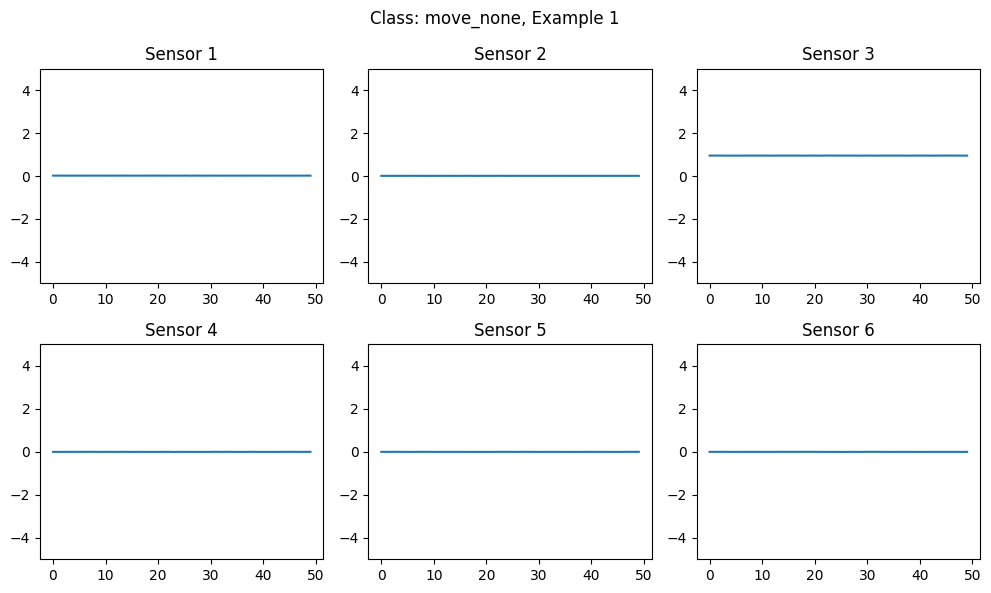

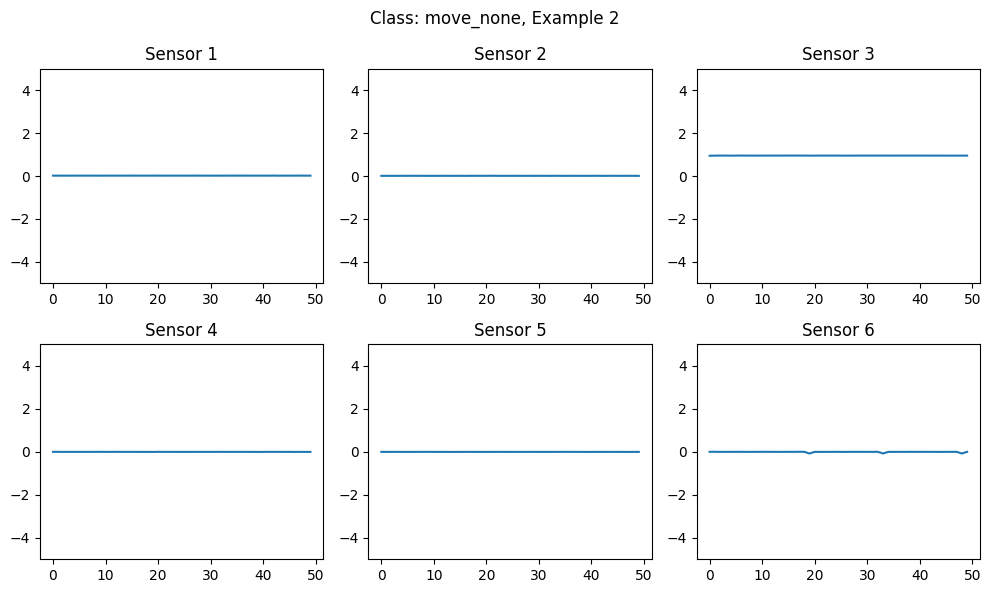

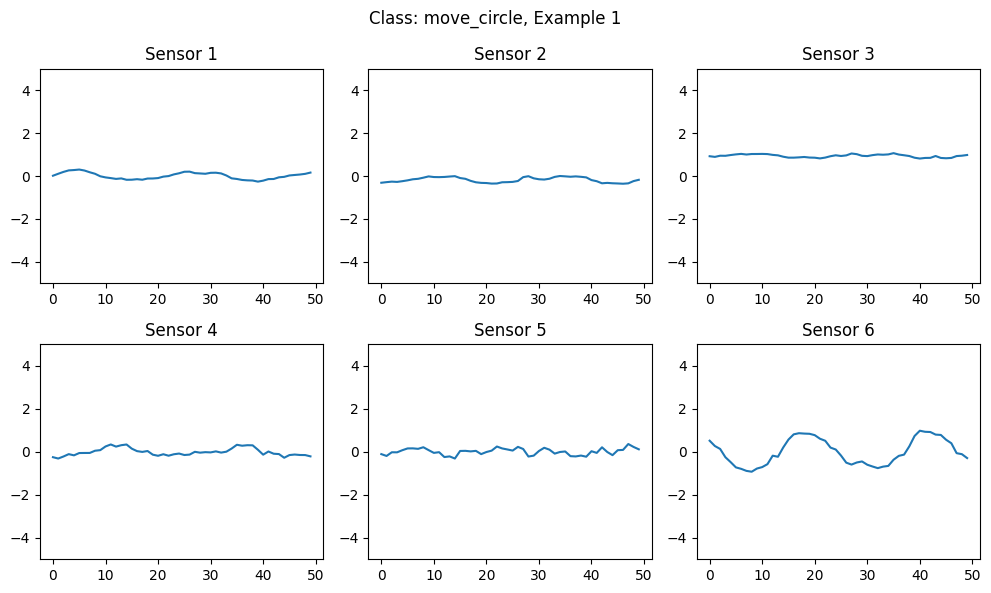

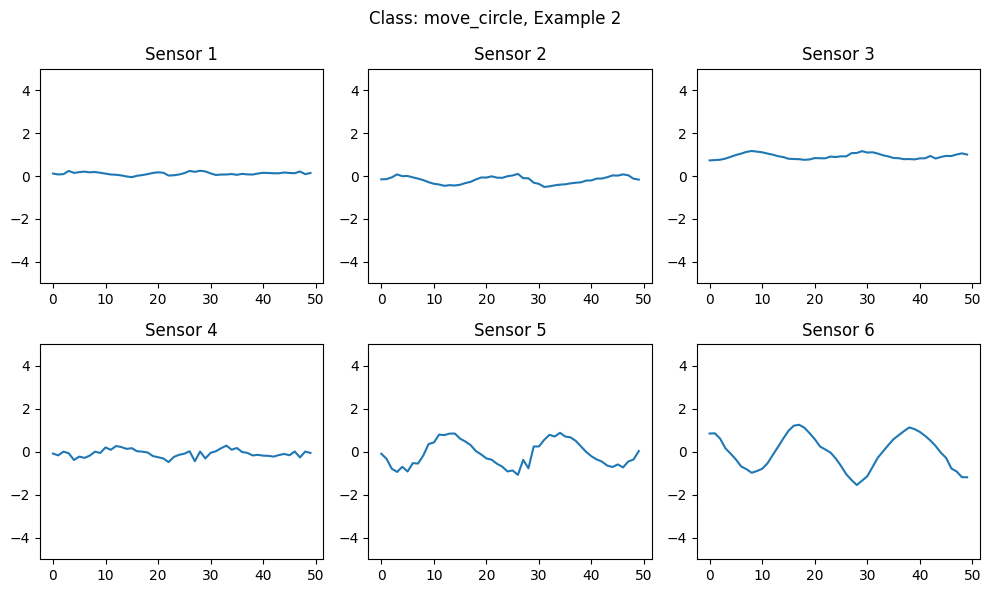

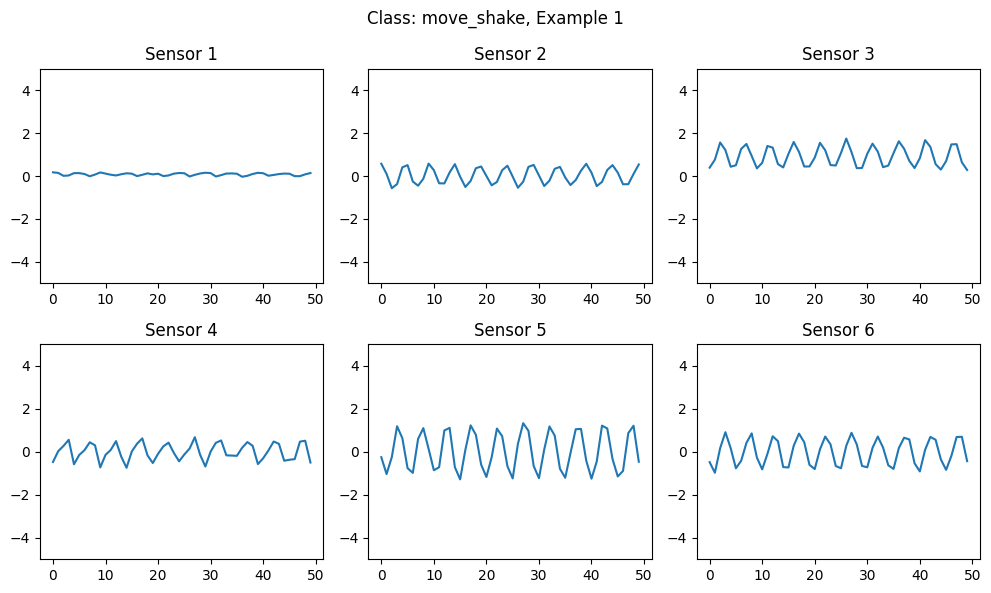

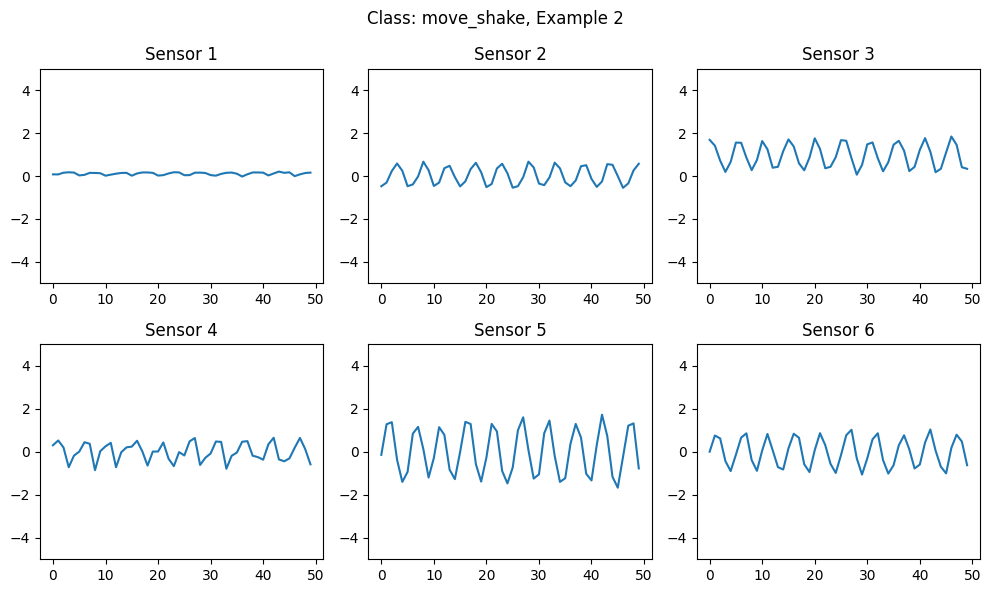

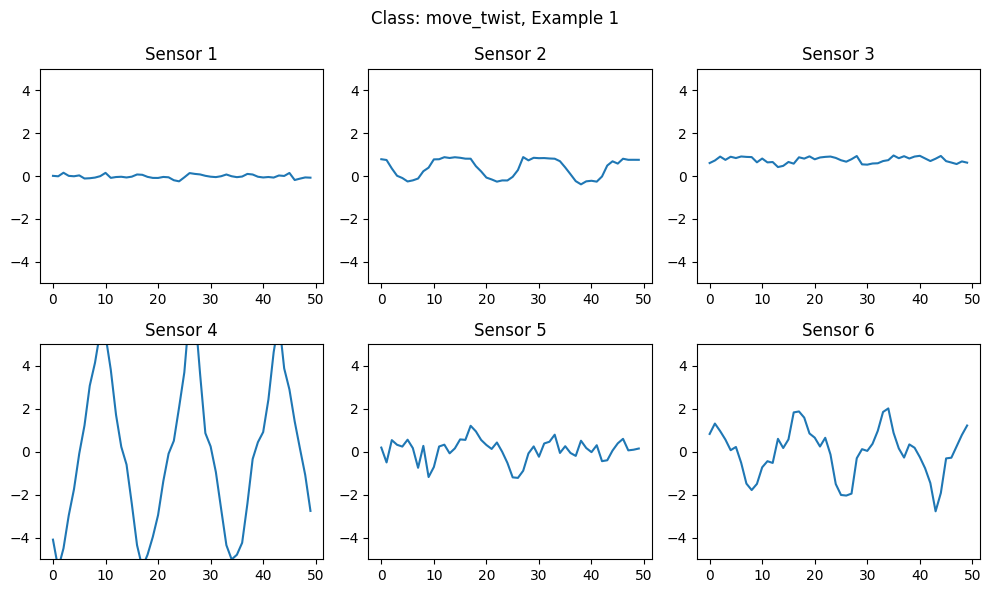

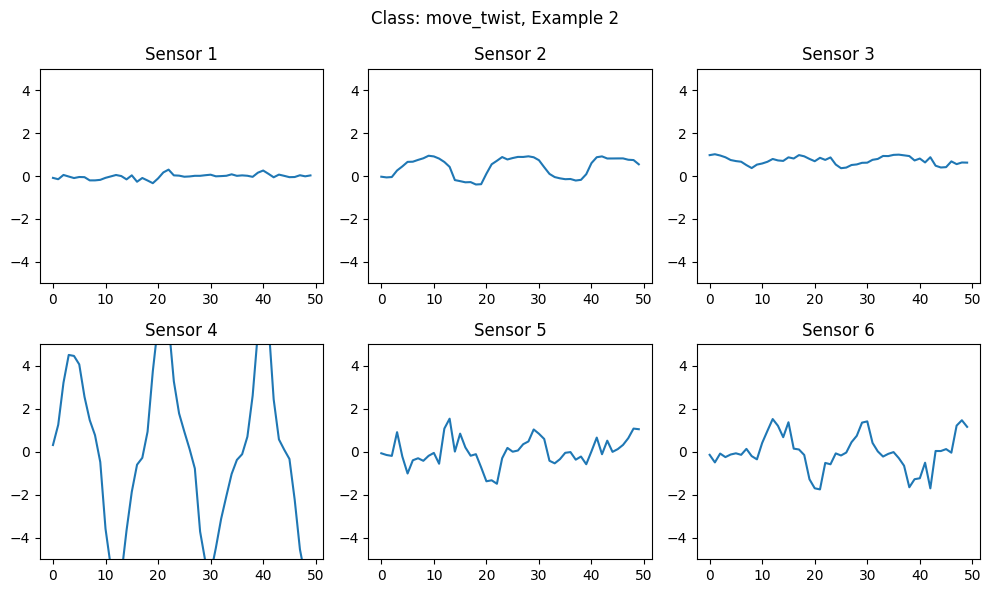

In [ ]:
import matplotlib.pyplot as plt

num_examples_per_class = 2  # Number of examples to plot per class
y_min = -5
y_max = 5

label_map_inv = {0: "move_none", 1: "move_circle", 2: "move_shake", 3: "move_twist"}

for label in range(4):
    class_files = [f for f in os.listdir(f"motion_data/{label_map_inv[label]}") if f.endswith(".npy")]
    for i in range(min(num_examples_per_class, len(class_files))):
        file_path = f"motion_data/{label_map_inv[label]}/{class_files[i]}"
        sample = np.load(file_path)

        plt.figure(figsize=(10, 6))
        for j in range(6):
            plt.subplot(2, 3, j + 1)
            plt.plot(sample[:, j])
            plt.ylim(y_min, y_max)  # Set y-axis limits
            plt.title(f"Sensor {j+1}")
        plt.suptitle(f"Class: {label_map_inv[label]}, Example {i+1}")
        plt.tight_layout()
        plt.show()
